In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data_merge_labels = pd.read_csv("data_to_merge_labels.csv")
print("shape of data features :", data_merge_labels.shape )
data_merge_labels.head()

shape of data features : (374479, 15)


,consumer_id,occupation,gender,age_group,recency,frequency,quantity,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
0,1300016905,Service Holder,Male,18 To 35,85.00,6,6,2,0,0,0,1,1,2,0
1,1300019918,Housewife,Female,35+,82.00,2,2,0,1,0,0,0,0,0,1
2,1300028530,Student,Male,18 To 35,44.25,28,31,8,3,0,0,2,6,6,3
3,1300028697,Business,Male,35+,42.00,4,4,1,0,0,0,0,1,2,0
4,1300032742,Business,Male,18 To 35,23.00,2,2,1,0,0,0,0,0,1,0


In [3]:
data_encoded_scaled = pd.read_csv("data_encoded_scaled.csv")
print("shape of encoded data features :", data_encoded_scaled.shape )
data_encoded_scaled.head()

shape of encoded data features : (374479, 2)


,0,1
0,1.518483,0.328043
1,1.398809,-0.524158
2,-0.107094,5.015151
3,-0.196850,-0.098058
4,-0.954787,-0.524158


# Kmeans Machine Learning Algorithms

## Determine the optimal number of clusters

In [4]:
%%time
# Identify optimal number of clusters we want to segment the data

def optimal_number_clusters(data_scaled):
    """
    Calculates optimal number of clusted based on Elbow Method
    
    parameters: scaled data
    """
    Sum_of_squared_distances = []
    K = range(1, 10) # define the range of clusters we would like to cluster the data into

    for k in K:
        km = KMeans(n_clusters = k)
        km = km.fit(data_scaled)
        Sum_of_squared_distances.append(km.inertia_)

    plt.figure(figsize=(20,6))

    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs


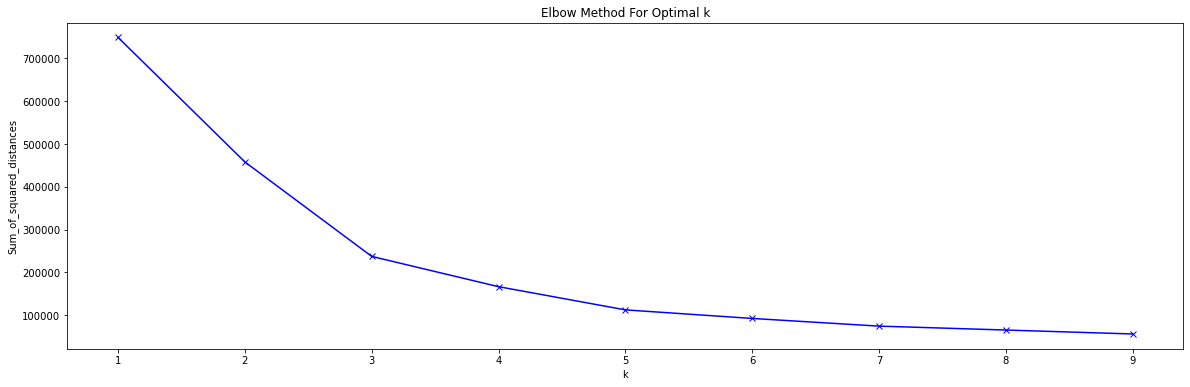

CPU times: user 1min 35s, sys: 24.8 s, total: 2min
Wall time: 17.1 s


In [5]:
%%time
# Show the elbow graph to choose the most optimal graph
optimal_number_clusters(data_encoded_scaled)

- We observe the elbow for k=3 clusters

In [6]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [7]:
%%time
# Compute the Calinski-Harabasz and the Davies-Bouldin Index scores for different numbers of cluster
# Calinski-Harabasz: Less the score is, the better It is
# Davies-Bouldin Index: the higher the score is, the better It is

X= data_encoded_scaled.copy()
se = [] 
calinski_score = []
davies_score = []
index = range(2, 7)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)
    se.append(kmeans.inertia_)
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))
 
    print('Intertia at K =', i, ':', kmeans.inertia_)
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))

Intertia at K = 2 : 458135.4471042766
Calinski-Harabasz Index: 237720.405
Davies-Bouldin Index: 0.990
Intertia at K = 3 : 237535.74204682722
Calinski-Harabasz Index: 403131.480
Davies-Bouldin Index: 0.634
Intertia at K = 4 : 166836.5740601589
Calinski-Harabasz Index: 435536.174
Davies-Bouldin Index: 0.680
Intertia at K = 5 : 112669.82817788326
Calinski-Harabasz Index: 528698.374
Davies-Bouldin Index: 0.633
Intertia at K = 6 : 92606.5378463229
Calinski-Harabasz Index: 530826.123
Davies-Bouldin Index: 0.725
CPU times: user 39.6 s, sys: 10.8 s, total: 50.4 s
Wall time: 7.26 s


In [8]:
# Compare the scores
scores_dict = {'number_cluster': index, "inertia": se, "calinski_score":calinski_score, "davies_score":davies_score}
scores = pd.DataFrame(scores_dict)
scores

,number_cluster,inertia,calinski_score,davies_score
0,2,458135.447104,237720.405390,0.990095
1,3,237535.742047,403131.480091,0.634081
2,4,166836.574060,435536.173599,0.680173
3,5,112669.828178,528698.374360,0.633329
4,6,92606.537846,530826.123460,0.725199


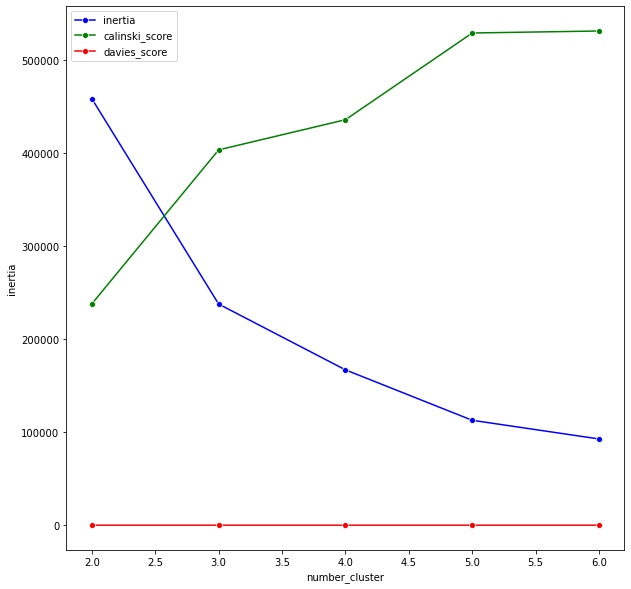

In [9]:
# Visualisation of the score comparison
fig, ax = plt.subplots(figsize=(10,10))
ax= sns.lineplot(x='number_cluster', y='inertia', marker='o', color='b', label= 'inertia', data=scores)
ax1 = sns.lineplot(x='number_cluster', y='calinski_score',marker='o', color='g', label= 'calinski_score', data=scores)
ax2 = sns.lineplot(x='number_cluster', y='davies_score', marker='o', color='r', label= 'davies_score', data=scores)

- We can see that 3 is the optimum number of clusters

## Selected Machine Learning: KMEANS with 3 clusters

In [10]:
%%time

n_clusters = 3 # define the number of clusters, where the elbow if formed

kmeans = KMeans(n_clusters = n_clusters, random_state = 10) # initialize the k-means function
kmeans.fit(data_encoded_scaled) # fit to the scaled data

CPU times: user 7.61 s, sys: 1.97 s, total: 9.57 s
Wall time: 1.37 s


KMeans(n_clusters=3, random_state=10)

In [11]:
# predict the clusters for each consumer

y_kmeans = kmeans.predict(data_encoded_scaled)
y_kmeans

array([1, 1, 2, ..., 1, 1, 0], dtype=int32)

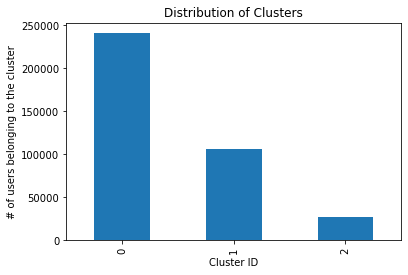

In [12]:
# check the distribution of the clusters

pd.DataFrame(Counter(y_kmeans).most_common()).set_index(0).plot.bar(legend=None)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of users belonging to the cluster');


In [13]:
kmeans.cluster_centers_.shape

(3, 2)

In [14]:
print("The centroids for the clusters")
pd.DataFrame(kmeans.cluster_centers_, columns = data_encoded_scaled.columns)

The centroids for the clusters


,0,1
0,-0.603338,-0.234169
1,1.350390,-0.187447
2,0.053395,2.787391


In [15]:
# join this to our data frame

results = pd.DataFrame(data_merge_labels.copy())
results.insert(7, 'cluster', y_kmeans)
results["number_consumers"] = 1
print(results.info())
results.head()

# the customers and their assigned clusters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374479 entries, 0 to 374478
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   consumer_id            374479 non-null  int64  
 1   occupation             374479 non-null  object 
 2   gender                 374479 non-null  object 
 3   age_group              374479 non-null  object 
 4   recency                374479 non-null  float64
 5   frequency              374479 non-null  int64  
 6   quantity               374479 non-null  int64  
 7   cluster                374479 non-null  int32  
 8   cat_Cleaning Supplies  374479 non-null  int64  
 9   cat_Drink              374479 non-null  int64  
 10  cat_Facecream          374479 non-null  int64  
 11  cat_Facewash           374479 non-null  int64  
 12  cat_Shampoo            374479 non-null  int64  
 13  cat_Skincare           374479 non-null  int64  
 14  cat_Soap               374479 non-nu

,consumer_id,occupation,gender,age_group,recency,frequency,quantity,cluster,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry,number_consumers
0,1300016905,Service Holder,Male,18 To 35,85.00,6,6,1,2,0,0,0,1,1,2,0,1
1,1300019918,Housewife,Female,35+,82.00,2,2,1,0,1,0,0,0,0,0,1,1
2,1300028530,Student,Male,18 To 35,44.25,28,31,2,8,3,0,0,2,6,6,3,1
3,1300028697,Business,Male,35+,42.00,4,4,0,1,0,0,0,0,1,2,0,1
4,1300032742,Business,Male,18 To 35,23.00,2,2,0,1,0,0,0,0,0,1,0,1


Text(0.5, 1.0, 'Cluster distribution')

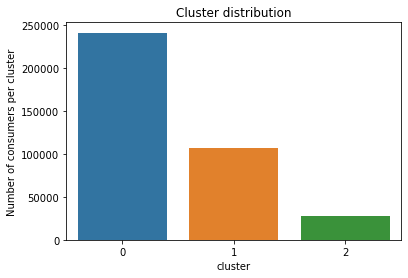

In [16]:
ax = sns.countplot(x='cluster', data=results)
ax.set_ylabel("Number of consumers per cluster")
plt.title("Cluster distribution")

In [17]:
# Number of customers in each cluster
round(results.cluster.value_counts(), 2)

0    240711
1    106489
2     27279
Name: cluster, dtype: int64

In [18]:
# Weight percentage of each cluster
round(results.cluster.value_counts(normalize=True), 2)

0    0.64
1    0.28
2    0.07
Name: cluster, dtype: float64

# Clusters Analysis

In [19]:
# Summarize each clusters attributes
products_cat = ['cat_Cleaning Supplies', 'cat_Drink', 'cat_Facecream','cat_Facewash',\
                  'cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']

cluster_behavior_sum = results.groupby(['cluster'], as_index=False).agg({
    'number_consumers': 'sum',
    'recency':'mean',
    'frequency':'mean',
    'cat_Cleaning Supplies':'mean',
    'cat_Drink': 'mean', 
    'cat_Facecream': 'mean' ,
    'cat_Facewash': 'mean',
    'cat_Shampoo': 'mean',
    'cat_Skincare' : 'mean',
    'cat_Soap': 'mean',
    'cat_Toiletry':'mean'
})
round(cluster_behavior_sum, 2)



,cluster,number_consumers,recency,frequency,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
0,0,240711,31.81,3.36,0.97,0.16,0.00,0.01,0.11,0.45,1.27,0.39
1,1,106489,80.78,3.58,1.04,0.23,0.00,0.01,0.13,0.33,1.41,0.43
2,2,27279,48.24,17.57,5.24,0.92,0.01,0.05,0.77,2.25,6.26,2.09


<AxesSubplot:>

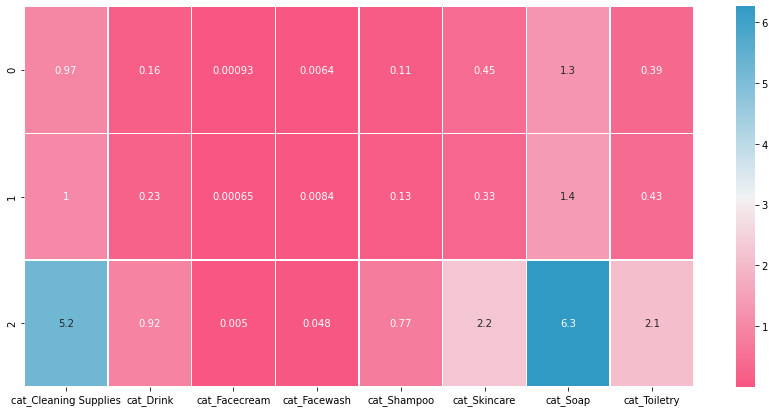

In [20]:
plt.figure(figsize=(15, 7)) 
sns.heatmap(cluster_behavior_sum [products_cat], cmap =sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
, linewidths = 0.30, annot = True)

<blockquote> Cluster 0 : represents 64% of the consumers; low recency and low frequence of purchases; <br>
favorites products(Cat_Soap > Cat_Cleaning Supplies > cat_Skincare ) </blockquote>

<blockquote> Cluster 1 : represents 28% of the consumers; high recency and low frequence of purchases; <br>
favorites products : cat_Soap > cat_Cleaning Supplies > cat_Toiletry </blockquote>

<blockquote> Cluster 2 : represents 7% of the consumers; low recency and high frequence of purchases; <br>
favorites products : cat_Soap > cat_Cleaning Supplies > cat_Skincare > cat_Toiletry > cat_Drink > Cleaning cat_Shampoo</blockquote>

In [21]:
# Let's focus on the recency, frequency and quantity for each cluster 
cluster_behavior = results.groupby(['cluster'], as_index=False).agg({
    'number_consumers':'sum',
    'recency':'mean',
    'frequency':'mean',
    'quantity': 'mean'    
})
round(cluster_behavior, 2)

,cluster,number_consumers,recency,frequency,quantity
0,0,240711,31.81,3.36,3.54
1,1,106489,80.78,3.58,3.78
2,2,27279,48.24,17.57,18.73


- We can analyse how each cluster differ from other by observing their mean values in the recency and the frequency attributes

In [22]:
# Gender analaysis
behavior_gender = results.groupby(['gender','cluster'], as_index=False).agg({
    'number_consumers': 'sum',
    'recency':'mean',
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

related_to_frequency = ['frequency','cat_Cleaning Supplies', 'cat_Drink',\
'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry'] 
# Define the column to transform in percentage

behavior_gender[related_to_frequency] = round(behavior_gender[related_to_frequency]*100\
                                              /behavior_gender['frequency'].sum(),1) 
# Compute to show the values in percentage

behavior_gender.sort_values('frequency', ascending=False) # Sort values by frequency

,gender,cluster,number_consumers,recency,frequency,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
3,Male,0,207000,32.039793,41.6,12.0,1.9,0.0,0.1,1.4,5.5,15.8,4.8
5,Male,2,23443,48.336959,24.7,7.3,1.3,0.0,0.1,1.1,3.1,8.8,2.9
4,Male,1,92138,80.775689,19.8,5.7,1.3,0.0,0.0,0.7,1.8,7.8,2.4
0,Female,0,33341,30.438173,6.8,2.0,0.3,0.0,0.0,0.2,0.9,2.5,0.8
2,Female,2,3812,47.645081,4.0,1.2,0.2,0.0,0.0,0.2,0.5,1.4,0.5
1,Female,1,14212,80.836904,3.0,0.9,0.2,0.0,0.0,0.1,0.3,1.2,0.3
6,Others,0,370,28.544350,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Others,1,139,80.628352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Others,2,24,43.222667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Age group analysis
behavior_age_group = results.groupby(['age_group'], as_index=False).agg({
    'number_consumers': 'sum',
    'recency':'mean',
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

related_to_frequency = ['frequency','cat_Cleaning Supplies', 'cat_Drink',\
'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry'] 
# Define the column to transform in percentage

behavior_age_group[related_to_frequency] = round(behavior_age_group[related_to_frequency]*100\
                        /behavior_age_group['frequency'].sum(),1) # Compute to show the values in percentage

behavior_age_group.sort_values('frequency', ascending=False) # Sort values by frequency

,age_group,number_consumers,recency,frequency,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
1,18 To 35,298653,46.851240,80.6,23.5,4.3,0.0,0.2,3.1,10.0,30.0,9.5
2,35+,69764,47.171999,17.9,5.3,0.9,0.0,0.0,0.6,2.1,7.0,2.0
0,18 < (Less Than 18),6062,48.311197,1.5,0.4,0.1,0.0,0.0,0.1,0.2,0.6,0.2


- 80% of the purchases is made by the age group 18 To 35

In [24]:
# Age occupation analysis
behavior_occupation = results.groupby(['occupation'], as_index=False).agg({
    'number_consumers': 'sum',
    'recency':'mean',
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

related_to_frequency = ['frequency','cat_Cleaning Supplies', 'cat_Drink',\
'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry'] 
# Define the column to transform in percentage

behavior_occupation[related_to_frequency] = round(behavior_occupation[related_to_frequency]*100\
                        /behavior_occupation['frequency'].sum(),1) # Compute to show the values in percentage

behavior_occupation.sort_values('frequency', ascending=False) # Sort values by frequency

,occupation,number_consumers,recency,frequency,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
3,Service Holder,147523,47.727201,37.7,11.2,2.0,0.0,0.1,1.4,4.5,14.0,4.5
0,Business,107189,45.660904,29.4,8.6,1.5,0.0,0.1,1.1,3.6,11.2,3.4
4,Student,48506,48.156122,14.2,4.1,0.7,0.0,0.0,0.6,1.8,5.3,1.7
2,Others,37557,47.035042,9.9,2.8,0.5,0.0,0.0,0.4,1.3,3.8,1.2
1,Housewife,33704,45.646534,8.7,2.6,0.5,0.0,0.0,0.3,1.1,3.3,1.0


- The Service holder is the occupation that purchased more product. mainly cat_Cleaning Supplies and cat_Soap

### In details Cluster analysis

In [25]:
# what does largest group look like
results["consumer_id"] = results["consumer_id"].astype('str')
cluster0 = results[results.cluster == 0]
cluster1 = results[results.cluster == 1]
cluster2 = results[results.cluster == 2]

cat_label = ['gender', 'age_group','occupation']
products_label = ['cat_Cleaning Supplies', 'cat_Drink', 'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']

In [26]:
# Let's look at the main characteristics of the cluster 0
cluster_behavior_0 = cluster0.groupby(['gender', 'age_group','occupation'], as_index=False).agg({
    'recency':'sum',
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

cat_label = ['cluster','gender', 'age_group','occupation']
products_label = ['cat_Cleaning Supplies', 'cat_Drink', 'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']

cluster_behavior_0[products_label] = cluster_behavior_0[products_label]*100/(cluster_behavior_0["frequency"].sum())
round(cluster_behavior_0, 2)

cluster_behavior_0_imp = cluster_behavior_0[(cluster_behavior_0['cat_Cleaning Supplies']>1) | (cluster_behavior_0['cat_Drink']>1) |\
                        (cluster_behavior_0['cat_Facecream']>1) | (cluster_behavior_0['cat_Facewash']>1) |(cluster_behavior_0['cat_Shampoo']>1)|\
                        (cluster_behavior_0['cat_Skincare']>1) |(cluster_behavior_0['cat_Soap']>1) |(cluster_behavior_0['cat_Toiletry']>1)]
                                           
cluster_behavior_0_imp = round(cluster_behavior_0_imp,2)
cluster_behavior_0_imp


,gender,age_group,occupation,recency,frequency,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
6,Female,18 To 35,Housewife,477874.82,51803,1.88,0.33,0.00,0.02,0.20,0.87,2.39,0.71
20,Male,18 To 35,Business,1579485.12,169745,5.98,0.95,0.01,0.04,0.70,2.88,8.01,2.40
22,Male,18 To 35,Others,504147.40,51287,1.73,0.27,0.00,0.01,0.22,0.87,2.49,0.74
23,Male,18 To 35,Service Holder,2416009.94,249405,9.07,1.48,0.01,0.06,1.11,4.04,11.46,3.60
24,Male,18 To 35,Student,722931.82,79337,2.77,0.45,0.00,0.02,0.35,1.35,3.68,1.18
25,Male,35+,Business,546892.74,59209,2.15,0.33,0.00,0.01,0.22,0.92,2.86,0.82
27,Male,35+,Others,258405.44,25429,0.88,0.13,0.00,0.00,0.09,0.40,1.28,0.35
28,Male,35+,Service Holder,430309.99,43384,1.64,0.24,0.00,0.01,0.15,0.66,2.06,0.60


<AxesSubplot:>

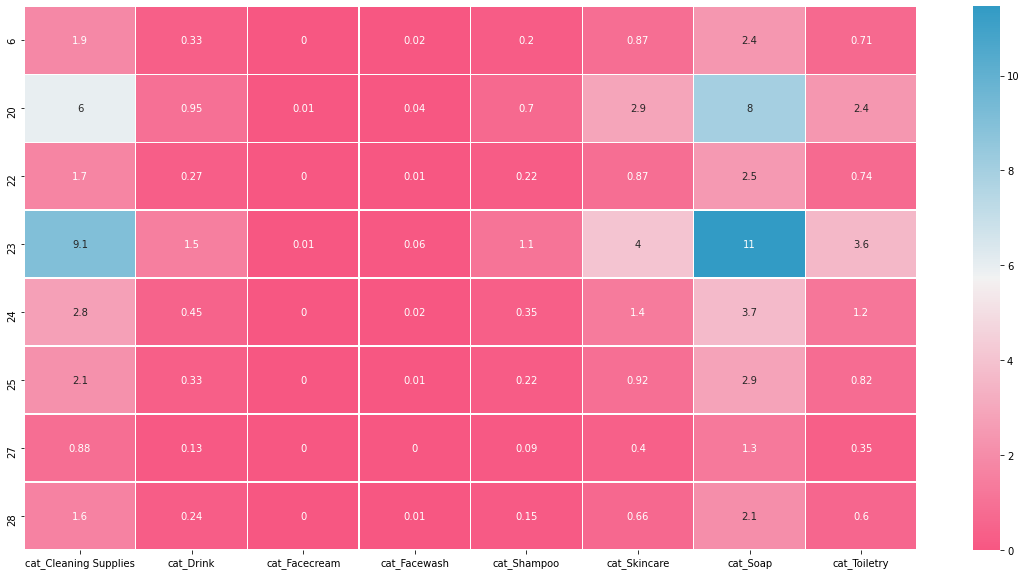

In [27]:
plt.figure(figsize=(20, 10))
sns.heatmap(cluster_behavior_0_imp[products_label], cmap =sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
, linewidths = 0.30, annot = True)

In [28]:
# Let's look at the main characteristics of the cluster 1
cluster_behavior_1 = cluster1.groupby(['gender', 'age_group','occupation'], as_index=False).agg({
    'recency':'sum',
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

cat_label = ['cluster','gender', 'age_group','occupation']
products_label = ['cat_Cleaning Supplies', 'cat_Drink', 'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']

cluster_behavior_1[products_label] = cluster_behavior_1[products_label]*100/(cluster_behavior_1["frequency"].sum())
round(cluster_behavior_1, 2)

cluster_behavior_1_imp =cluster_behavior_1[(cluster_behavior_1['cat_Cleaning Supplies']>1) | (cluster_behavior_1['cat_Drink']>1) |\
                        (cluster_behavior_1['cat_Facecream']>1) | (cluster_behavior_1['cat_Facewash']>1) |(cluster_behavior_1['cat_Shampoo']>1)|\
                        (cluster_behavior_1['cat_Skincare']>1) |(cluster_behavior_1['cat_Soap']>1) |(cluster_behavior_1['cat_Toiletry']>1)]
                                           
cluster_behavior_1_imp = round(cluster_behavior_1_imp,2)
cluster_behavior_1_imp

,gender,age_group,occupation,recency,frequency,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
6,Female,18 To 35,Housewife,518826.40,22503,1.79,0.39,0.0,0.01,0.22,0.55,2.28,0.65
20,Male,18 To 35,Business,1592147.13,72589,5.37,1.24,0.0,0.04,0.69,1.76,7.61,2.30
22,Male,18 To 35,Others,531805.21,24088,1.71,0.49,0.0,0.02,0.23,0.70,2.40,0.76
23,Male,18 To 35,Service Holder,2806734.89,124254,9.53,2.13,0.0,0.06,1.21,2.96,12.71,3.95
24,Male,18 To 35,Student,920312.39,42357,3.18,0.69,0.0,0.03,0.44,1.06,4.31,1.39
25,Male,35+,Business,621175.91,27444,2.13,0.41,0.0,0.02,0.24,0.62,2.95,0.81
27,Male,35+,Others,241655.52,9920,0.74,0.13,0.0,0.01,0.09,0.25,1.07,0.32
28,Male,35+,Service Holder,534019.28,21756,1.70,0.31,0.0,0.01,0.17,0.49,2.37,0.66


<AxesSubplot:>

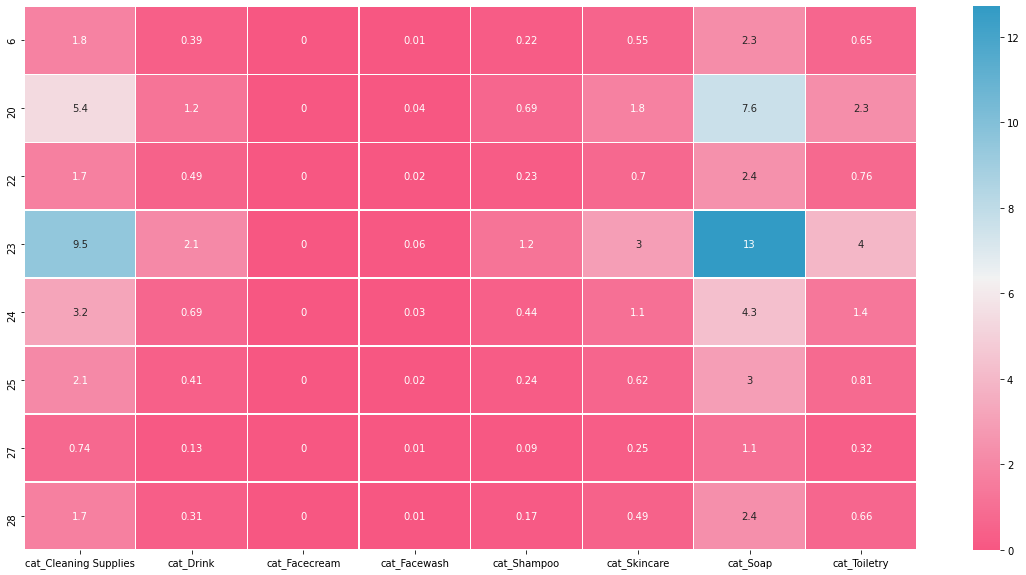

In [29]:
plt.figure(figsize=(20, 10))
sns.heatmap(cluster_behavior_1_imp[products_label], cmap =sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
, linewidths = 0.30, annot = True)

In [30]:
# Let's look at the main characteristics of the cluster 2
cluster_behavior_2 = cluster2.groupby(['gender', 'age_group','occupation'], as_index=False).agg({
    'recency':'sum',
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

cat_label = ['cluster','gender', 'age_group','occupation']
products_label = ['cat_Cleaning Supplies', 'cat_Drink', 'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']

cluster_behavior_2[products_label] = cluster_behavior_2[products_label]*100/(cluster_behavior_2["frequency"].sum())
round(cluster_behavior_2, 2)

cluster_behavior_2_imp = cluster_behavior_2[(cluster_behavior_2['cat_Cleaning Supplies']>1) | (cluster_behavior_2['cat_Drink']>1) |\
                        (cluster_behavior_2['cat_Facecream']>1) | (cluster_behavior_2['cat_Facewash']>1) |(cluster_behavior_2['cat_Shampoo']>1)|\
                        (cluster_behavior_2['cat_Skincare']>1) |(cluster_behavior_2['cat_Soap']>1) |(cluster_behavior_2['cat_Toiletry']>1)]
                                           
cluster_behavior_2_imp = round(cluster_behavior_2_imp,2)
cluster_behavior_2_imp

,gender,age_group,occupation,recency,frequency,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
5,Female,18 To 35,Housewife,82812.49,30565,1.90,0.33,0.00,0.02,0.27,0.86,2.25,0.75
18,Male,18 To 35,Business,284331.63,105204,6.52,1.15,0.01,0.06,0.92,2.76,7.97,2.57
20,Male,18 To 35,Others,95033.50,34458,2.07,0.38,0.00,0.03,0.40,1.01,2.48,0.82
21,Male,18 To 35,Service Holder,381675.56,134475,8.37,1.52,0.01,0.07,1.25,3.67,9.76,3.40
22,Male,18 To 35,Student,164752.92,60524,3.76,0.64,0.00,0.03,0.54,1.59,4.50,1.56
23,Male,35+,Business,100899.62,38637,2.45,0.40,0.00,0.03,0.31,0.90,3.03,0.94
26,Male,35+,Service Holder,51700.17,18687,1.18,0.19,0.00,0.01,0.15,0.49,1.43,0.45


<AxesSubplot:>

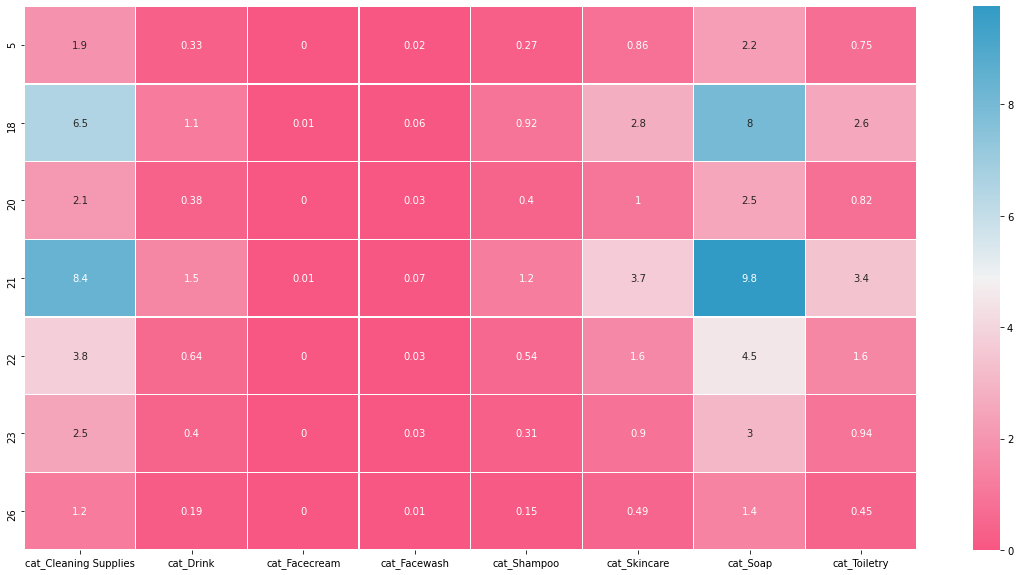

In [31]:
plt.figure(figsize=(20, 10))
sns.heatmap(cluster_behavior_2_imp[products_label], cmap =sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
, linewidths = 0.30, annot = True)

In [33]:
# Let's look at the distribution of the of purchases by clusters in percentage
cluster_behavior2 = results.groupby(['cluster'], as_index=False).agg({
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

clust = round(cluster_behavior2*100/cluster_behavior2['frequency'].sum(),1)
clust

,cluster,frequency,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
0,0.0,48.5,14.0,2.3,0.0,0.1,1.6,6.5,18.4,5.6
1,0.0,22.8,6.6,1.5,0.0,0.1,0.8,2.1,9.0,2.7
2,0.0,28.7,8.6,1.5,0.0,0.1,1.3,3.7,10.2,3.4


-This table shows the repartition of purchases in percentage between clusters and product gategories

In [34]:
# Let's look at the distribution of purchases by clusters
cluster_behavior2 = results.groupby(['cluster', 'gender'], as_index=False).agg({
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

cluster_behavior2[['frequency','cat_Cleaning Supplies','cat_Drink', 'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']] = round(cluster_behavior2[['frequency','cat_Cleaning Supplies','cat_Drink', 'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']]*100/cluster_behavior2['frequency'].sum(),1)
cluster_behavior2

,cluster,gender,frequency,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
0,0,Female,6.8,2.0,0.3,0.0,0.0,0.2,0.9,2.5,0.8
1,0,Male,41.6,12.0,1.9,0.0,0.1,1.4,5.5,15.8,4.8
2,0,Others,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,Female,3.0,0.9,0.2,0.0,0.0,0.1,0.3,1.2,0.3
4,1,Male,19.8,5.7,1.3,0.0,0.0,0.7,1.8,7.8,2.4
5,1,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2,Female,4.0,1.2,0.2,0.0,0.0,0.2,0.5,1.4,0.5
7,2,Male,24.7,7.3,1.3,0.0,0.1,1.1,3.1,8.8,2.9
8,2,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Let's look at the main characteristics of each cluster
cluster_behavior = cluster0.groupby(['cluster','gender', 'age_group','occupation'], as_index=False).agg({
    'recency':'mean',
    'frequency':'mean',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

cluster_behavior.head()

,cluster,gender,age_group,occupation,recency,frequency,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
0,0,Female,18 < (Less Than 18),Business,30.733333,3.200000,2,0,0,3,8,15,4
1,0,Female,18 < (Less Than 18),Housewife,32.343676,3.666667,18,0,0,15,35,70,25
2,0,Female,18 < (Less Than 18),Others,39.554762,3.277778,2,0,0,5,8,18,5
3,0,Female,18 < (Less Than 18),Service Holder,29.817168,3.000000,7,0,1,7,25,66,23
4,0,Female,18 < (Less Than 18),Student,33.598419,3.818898,49,1,3,44,125,344,104


In [36]:
# what does the smallest group look like

results[results.cluster == 1].describe()

,recency,frequency,quantity,cluster,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry,number_consumers
count,106489.000000,106489.000000,106489.000000,106489.0,106489.000000,106489.000000,106489.000000,106489.000000,106489.000000,106489.000000,106489.000000,106489.000000,106489.0
mean,80.783667,3.583882,3.781555,1.0,1.037196,0.230324,0.000648,0.008405,0.131018,0.333321,1.414062,0.428908,1.0
std,5.557883,2.346443,2.530508,0.0,1.053512,0.479207,0.025813,0.094027,0.370708,0.579346,1.125592,0.616278,0.0
min,55.666667,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,79.000000,2.000000,2.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,82.000000,3.000000,3.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
75%,84.000000,5.000000,5.000000,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.0
max,87.000000,12.000000,23.000000,1.0,10.000000,5.000000,2.000000,3.000000,4.000000,5.000000,9.000000,5.000000,1.0


In [37]:
# what does the group 0 look like
results[results.cluster == 0].describe()

,recency,frequency,quantity,cluster,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry,number_consumers
count,240711.000000,240711.000000,240711.000000,240711.0,240711.000000,240711.000000,240711.000000,240711.000000,240711.000000,240711.000000,240711.000000,240711.000000,240711.0
mean,31.812579,3.362572,3.536000,0.0,0.974555,0.157351,0.000926,0.006427,0.113447,0.447744,1.274287,0.387834,1.0
std,14.089527,2.153048,2.318463,0.0,1.008384,0.400283,0.030423,0.081096,0.341463,0.687770,1.057325,0.580431,0.0
min,2.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,19.000000,2.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,26.000000,3.000000,3.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
75%,46.000000,4.000000,5.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.0
max,56.333333,11.000000,24.000000,0.0,9.000000,5.000000,1.000000,2.000000,4.000000,7.000000,10.000000,5.000000,1.0


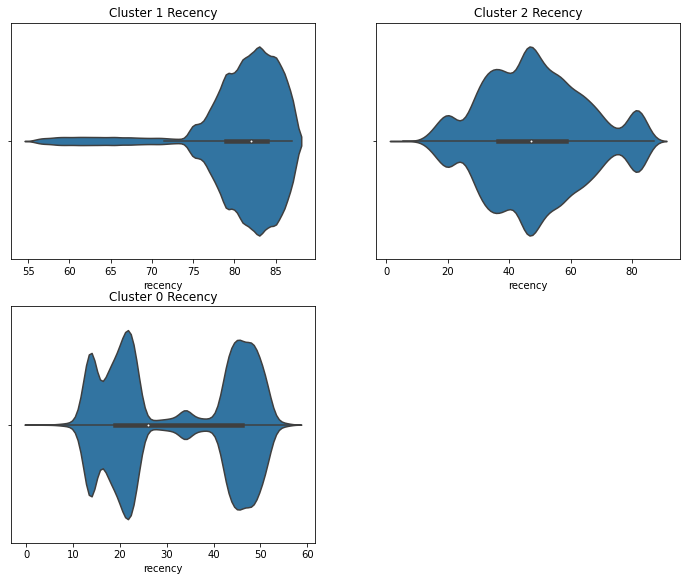

In [38]:
# Let's visualise the distribution difference between each group
# recency plots

clusters = results["cluster"].unique() 

x = 1
plt.figure(figsize=(12, 20))
for x, c in enumerate(clusters):
    ax = plt.subplot(4, 2, x + 1)
    plt.title(f'Cluster {c} Recency')
    sns.violinplot(x=results[results["cluster"] == c].recency);

- Visualise the distribution of each cluster by recency

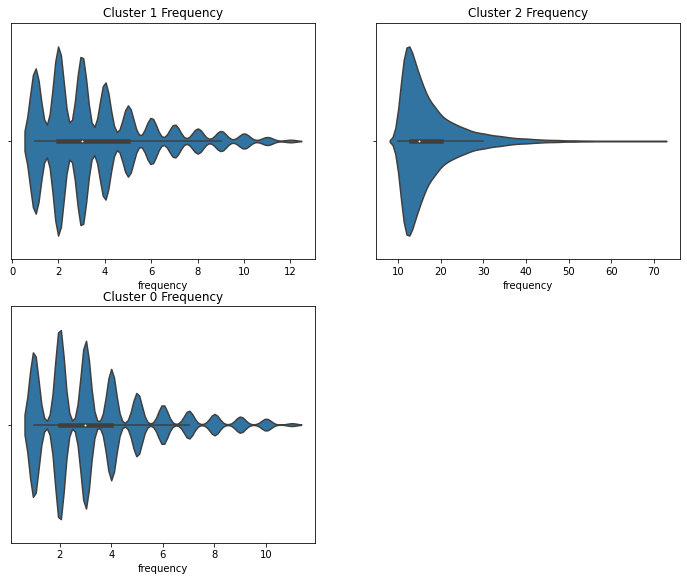

In [39]:
clusters = results["cluster"].unique() 

x = 1
plt.figure(figsize=(12, 20))
for x, c in enumerate(clusters):
    ax = plt.subplot(4, 2, x + 1)
    plt.title(f'Cluster {c} Frequency')
    sns.violinplot(x=results[results["cluster"] == c].frequency);

- Visualise the distribution of each cluster by frequency

<AxesSubplot:xlabel='frequency', ylabel='recency'>

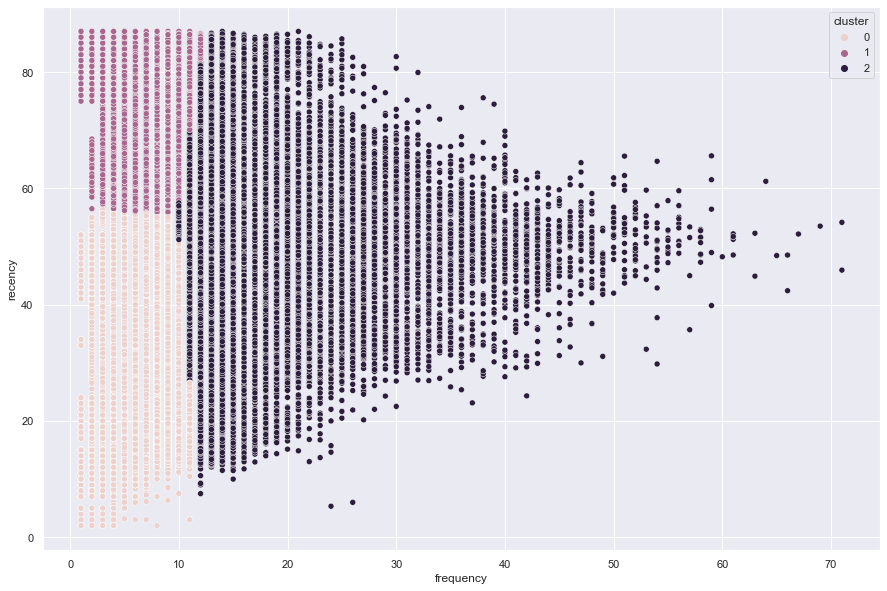

In [40]:
# Let's visualize the clusters
plt.figure(figsize = (15,10))
sns.set_theme()
sns.scatterplot(x="frequency", y='recency', data=results, hue="cluster")

In [41]:
# Let's visualise each group
from sklearn.decomposition import PCA


def visualize(y_kmeans, data_scaled, n_clusters):
    """
       Visualize the users with predicted clusters.
        
       Run PCA on the transposed data and reduce the dimnensions in pca_num_components dimensions
        
     """
        
    reduced_data = PCA(n_components = 2).fit_transform(data_scaled)
    results = pd.DataFrame(reduced_data, columns = ['pca1','pca2'])
    results = pd.concat([results, pd.DataFrame(y_kmeans)], axis = 1).rename(columns={0 : "cluster"})

    cmap = sns.color_palette("Set1", n_colors = n_clusters, desat = .5)
    
    plt.figure(figsize=(15,10))

    sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = results, palette = cmap, legend = True)
    plt.title('K-means Clustering with 2 dimensions')
    plt.show();
        

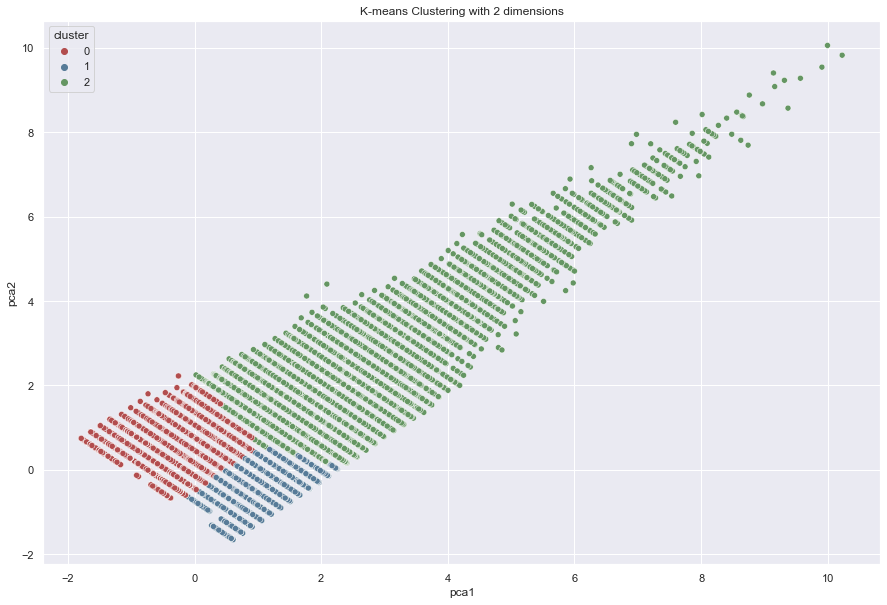

In [42]:
# visualising the pattern of the clusters
# We use the PCA here only for visualisation purposes 
n_clusters = 3
visualize(y_kmeans, data_encoded_scaled, n_clusters=n_clusters)

# the clusters more spread out have more variability

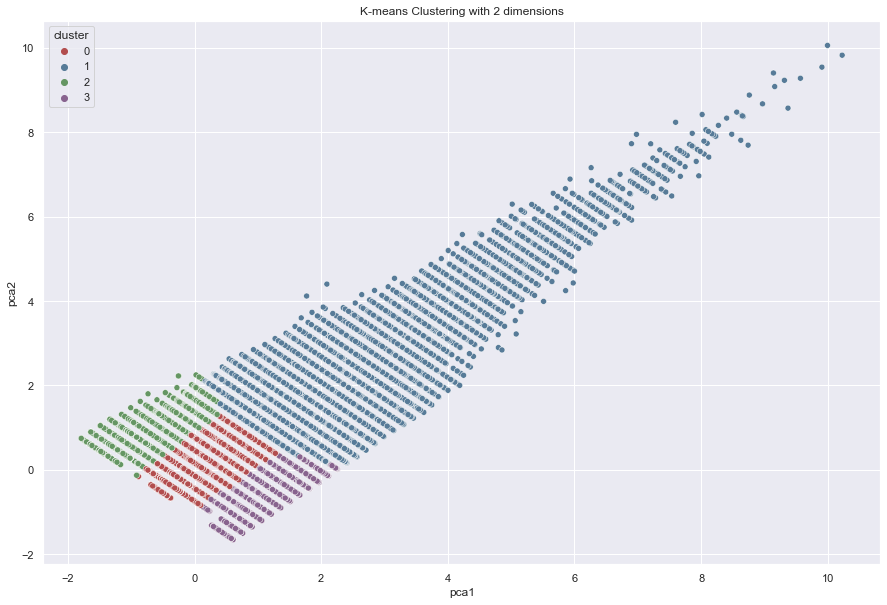

In [43]:
# For n=4 clusters we would have this distribution

n_clusters = 4 # define the number of clusters, where the elbow if formed

kmeans = KMeans(n_clusters = n_clusters, random_state = 10) # initialize the k-means function
kmeans.fit(data_encoded_scaled)
y_kmeans_4 = kmeans.predict(data_encoded_scaled)
visualize(y_kmeans_4, data_encoded_scaled, n_clusters=n_clusters)

- 